In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, MaxPooling2D, Conv2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
import tensorflow as tf

In [14]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
x_train =x_train.astype('float32')/255.0
x_test =x_test.astype('float32')/255.0

In [17]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# model = Sequential()
# model.add(Conv2D(32, (3,3), activation='relu', input_shape  = (32, 32, 3)))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(128,(3,3), activation = 'relu'))
# model.add(MaxPooling2D(2,2))
# model.add(Conv2D(64,(3,3), activation = 'relu'))
# model.add(Flatten())
# model.add(Dense(10, activation = 'softmax'))

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [19]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x324ceb790>>

In [20]:
history  = model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 12s 13ms/step - loss: 0.1722 - accuracy: 0.9481 - val_loss: 0.0448 - val_accuracy: 0.9848
Epoch 2/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0515 - accuracy: 0.9838 - val_loss: 0.0538 - val_accuracy: 0.9831
Epoch 3/5
938/938 [==============================] - 12s 12ms/step - loss: 0.0362 - accuracy: 0.9888 - val_loss: 0.0337 - val_accuracy: 0.9893
Epoch 4/5
938/938 [==============================] - 11s 12ms/step - loss: 0.0282 - accuracy: 0.9906 - val_loss: 0.0312 - val_accuracy: 0.9895
Epoch 5/5
938/938 [==============================] - 12s 13ms/step - loss: 0.0235 - accuracy: 0.9922 - val_loss: 0.0306 - val_accuracy: 0.9897


In [21]:
test_accuracy, test_loss = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0306 - accuracy: 0.9897


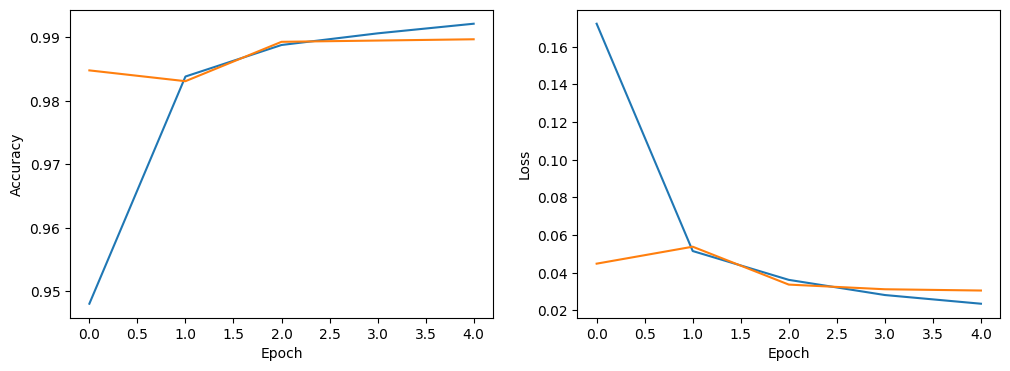

In [22]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

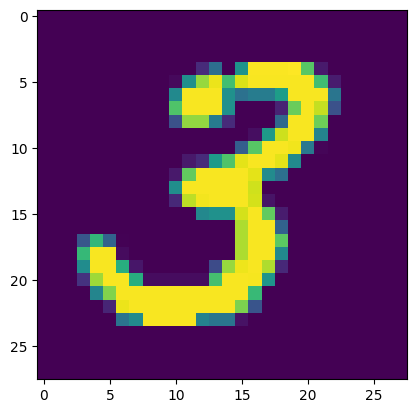

In [23]:
plt.imshow(x_train[255])
plt.show()